### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [71]:
import tensorflow as tf
tf.set_random_seed(42)

In [72]:
tf.__version__

'1.13.1'

### Collect Data

In [73]:
import keras

In [74]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [75]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [76]:
trainY=tf.keras.utils.to_categorical(trainY)
testY=tf.keras.utils.to_categorical(testY)

In [77]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

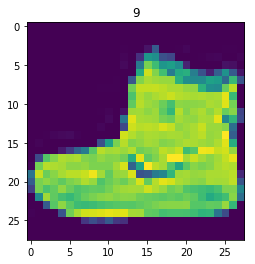

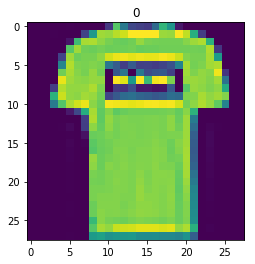

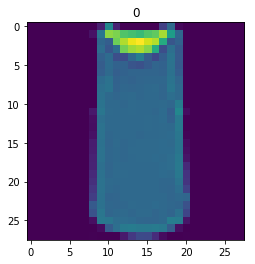

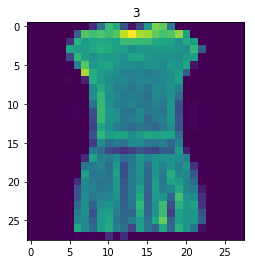

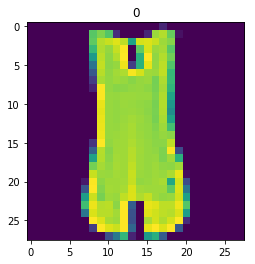

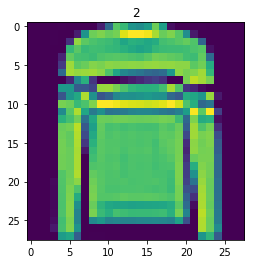

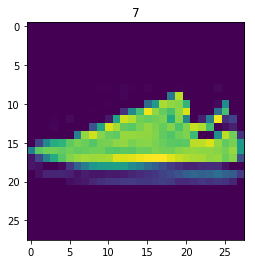

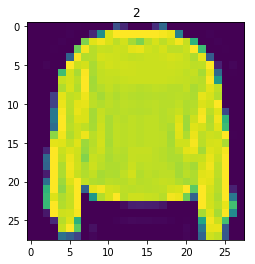

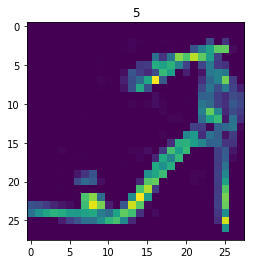

In [78]:
# Visualize the first image from the training dataset
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(0,9):
    plt.figure(i)
    plt.imshow(trainX[i])
    #plt.colorbar()
    plt.grid(False)
    plt.title(trainY[i].argmax())

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [101]:
# Create simple network with Keras
from keras.models import Sequential
from keras.layers import Dense
# create first model
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    #keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation='softmax')])
# Compile model
model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [102]:
# Fit the model
model_3.fit(trainX, trainY, nb_epoch=20, batch_size=5,  verbose=0)

C:\Users\sinamy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


In [103]:
scores = model_3.evaluate(trainX, trainY)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

60000/60000 [==============================] - 5s 75us/step
acc: 10.00%


In [111]:
scores = model_3.evaluate(testX, testY)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 0s 43us/step
acc: 10.00%


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [124]:
# Create simple network with Keras
from keras.models import Sequential
from keras.layers import Dense
# create first model
model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')])
# Compile model
model_4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 784)               3136      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [125]:
# Fit the model
model_4.fit(trainX, trainY, nb_epoch=20, batch_size=5,  verbose=0)
scores = model_4.evaluate(trainX, trainY)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

C:\Users\sinamy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


60000/60000 [==============================] - 4s 67us/step
acc: 84.34%


In [126]:
scores = model_4.evaluate(testX, testY)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 1s 58us/step
acc: 82.43%


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [127]:
# Create simple network with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
# create first model
model_5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')])
# Compile model
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.SGD(lr=0.001)
model_5.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_28 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 784)               3136      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [128]:
model_5.fit(trainX, trainY, nb_epoch=20, batch_size=5,  verbose=0)
scores = model_5.evaluate(trainX, trainY)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

C:\Users\sinamy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 4s 72us/step
acc: 84.77%


In [129]:
scores = model_5.evaluate(testX, testY)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 1s 64us/step
acc: 83.23%


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [135]:
# Create simple network with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
# create first model
model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')])
# Compile model
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.SGD(lr=0.03)
model_6.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 784)               3136      
_________________________________________________________________
dense_48 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_49 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_50 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


In [136]:
model_6.fit(trainX, trainY, nb_epoch=20, batch_size=5,  verbose=0)
scores = model_6.evaluate(trainX, trainY)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

C:\Users\sinamy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 6s 93us/step
acc: 89.18%


In [137]:
scores = model_6.evaluate(testX, testY)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 1s 80us/step
acc: 86.72%


## Review model

3 Layer NN with batch normalization layer gives best result.

### Run the model

In [139]:
#Running model on test data
scores = model_6.evaluate(testX, testY)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 1s 81us/step
acc: 86.72%
